Mounted at /content/drive


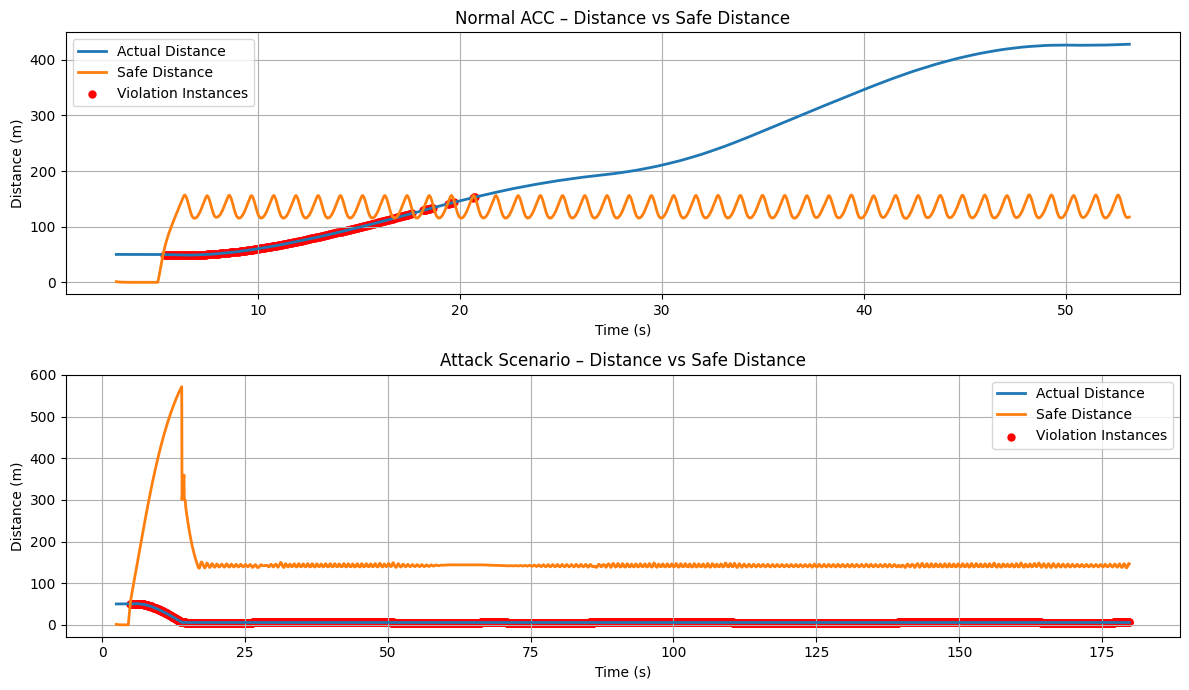

In [ ]:
# ==============================
# FINAL SINGLE WORKING CODE
# Google Colab + MyDrive dataset
# ==============================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# -------------------------------
# Parameters (consistent with paper)
# -------------------------------
HEADWAY = 2.0          # seconds
A_DECEL = 3.4          # m/s^2
DATA_PATH = "/content/drive/MyDrive/acc"   # <-- your folder in MyDrive

# -------------------------------
# Load a dataset run
# -------------------------------
def load_run(file_name):
    path = os.path.join(DATA_PATH, file_name)
    df = pd.read_csv(path)

    # Time
    t = df["timestamp"].values

    # Host & lead positions → distance gap
    ego = df[["ego_vehicle_x","ego_vehicle_y","ego_vehicle_z"]].values
    lead = df[["leader_vehicle_x","leader_vehicle_y","leader_vehicle_z"]].values
    gap = np.linalg.norm(lead - ego, axis=1)

    # Host speed (convert to km/h for safe distance formula)
    vh = df["ego_vehicle_v"].values
    vh_kmh = vh * 3.6

    # Safe distance (equation from paper)
    dsafe = 0.278 * HEADWAY * vh_kmh + 0.039 * (vh_kmh**2) / A_DECEL

    # Violation condition
    violation = gap < dsafe

    return t, gap, dsafe, violation

# -------------------------------
# Plot helper
# -------------------------------
def plot_run(ax, t, gap, dsafe, violation, title):
    ax.plot(t, gap, label="Actual Distance", linewidth=2)
    ax.plot(t, dsafe, label="Safe Distance", linewidth=2)

    # Mark violation instants
    ax.scatter(t[violation], gap[violation], color="red", s=25,
               label="Violation Instances")

    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Distance (m)")
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# -------------------------------
# Choose files
# -------------------------------
normal_file = "acc20220924-150615.csv"     # NORMAL
attack_file = "acc20220924-152419.csv"     # ATTACK

# Load data
t1, d1, s1, v1 = load_run(normal_file)
t2, d2, s2, v2 = load_run(attack_file)

# -------------------------------
# Plot both
# -------------------------------
plt.figure(figsize=(12,7))

ax1 = plt.subplot(2,1,1)
plot_run(ax1, t1, d1, s1, v1, "Normal ACC – Distance vs Safe Distance")

ax2 = plt.subplot(2,1,2)
plot_run(ax2, t2, d2, s2, v2, "Attack Scenario – Distance vs Safe Distance")

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


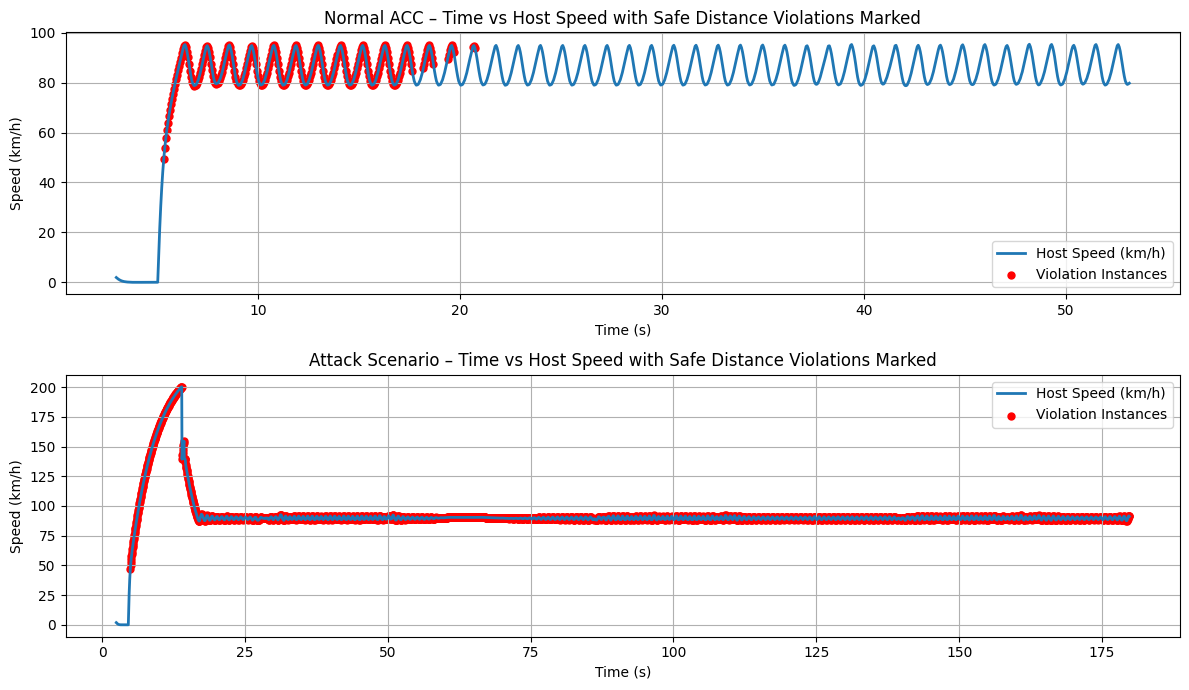

In [ ]:
# =============================================
# SAFE DISTANCE VIOLATION vs TIME–SPEED PLOT
# Normal vs Attack (Paper Equation Considered)
# =============================================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# -------------------------------
# Parameters from the paper
# -------------------------------
HEADWAY = 2.0          # seconds (h)
A_DECEL = 3.4          # m/s^2  (a)
DATA_PATH = "/content/drive/MyDrive/acc"   # <-- your folder

# -------------------------------
# Load + Compute Safe Distance
# -------------------------------
def load_run(file_name):
    path = os.path.join(DATA_PATH, file_name)
    df = pd.read_csv(path)

    # Time
    t = df["timestamp"].values

    # Speeds
    vh = df["ego_vehicle_v"].values       # m/s
    vh_kmh = vh * 3.6                     # convert to km/h for paper formula

    # Distance gap (Euclidean)
    ego = df[["ego_vehicle_x","ego_vehicle_y","ego_vehicle_z"]].values
    lead = df[["leader_vehicle_x","leader_vehicle_y","leader_vehicle_z"]].values
    gap = np.linalg.norm(lead - ego, axis=1)

    # Safe distance (Equation 8 from paper)
    dsafe = 0.278 * HEADWAY * vh_kmh + 0.039 * (vh_kmh**2) / A_DECEL

    # Violation condition
    violation = gap < dsafe

    return t, vh_kmh, violation


# -------------------------------
# Choose runs
# -------------------------------
normal_file = "acc20220924-150615.csv"
attack_file = "acc20220924-152419.csv"

t1, v1, viol1 = load_run(normal_file)
t2, v2, viol2 = load_run(attack_file)

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(12,7))

# ---------- NORMAL ----------
ax1 = plt.subplot(2,1,1)
ax1.plot(t1, v1, linewidth=2, label="Host Speed (km/h)")
ax1.scatter(t1[viol1], v1[viol1], color="red", s=25,
            label="Violation Instances")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Speed (km/h)")
ax1.set_title("Normal ACC – Time vs Host Speed with Safe Distance Violations Marked")
ax1.grid(True)
ax1.legend()

# ---------- ATTACK ----------
ax2 = plt.subplot(2,1,2)
ax2.plot(t2, v2, linewidth=2, label="Host Speed (km/h)")
ax2.scatter(t2[viol2], v2[viol2], color="red", s=25,
            label="Violation Instances")

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Speed (km/h)")
ax2.set_title("Attack Scenario – Time vs Host Speed with Safe Distance Violations Marked")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


Mounted at /content/drive


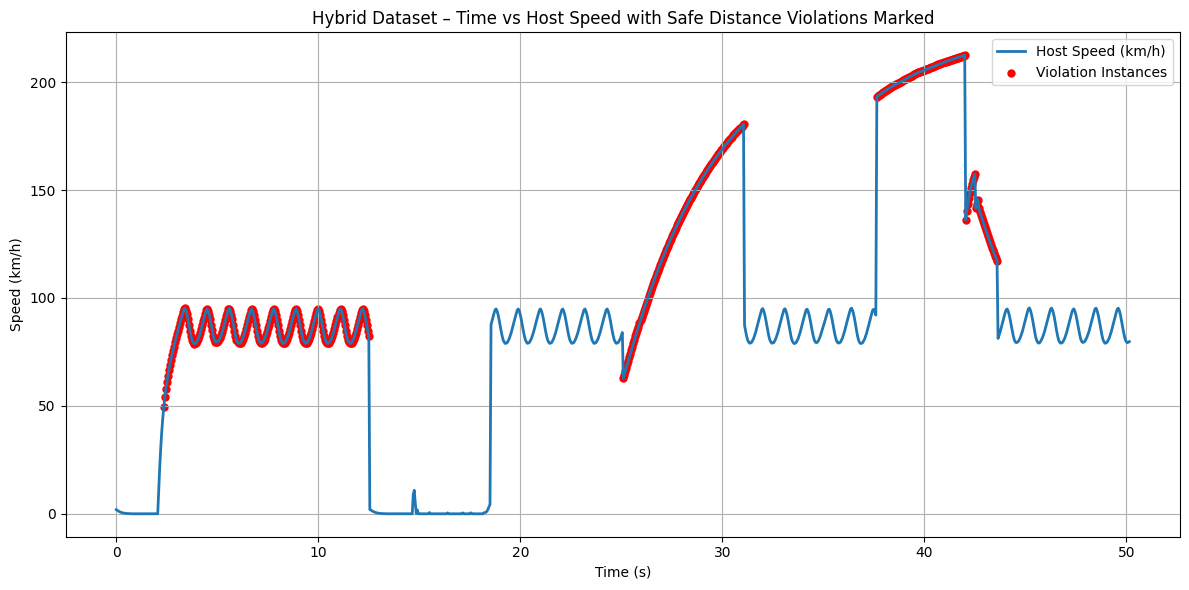

In [1]:
# =============================================
# SAFE DISTANCE VIOLATION vs TIME–SPEED PLOT
# Hybrid Dataset (Sparse Violations)
# =============================================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# -------------------------------
# Parameters from the paper
# -------------------------------
HEADWAY = 2.0          # seconds (h)
A_DECEL = 3.4          # m/s^2 (a)
DATA_PATH = "/content/drive/MyDrive/acc"

# -------------------------------
# Load + Compute Safe Distance
# -------------------------------
def load_run(file_name):
    path = os.path.join(DATA_PATH, file_name)
    df = pd.read_csv(path)

    # Time
    t = df["timestamp"].values

    # Host Speed
    vh = df["ego_vehicle_v"].values       # m/s
    vh_kmh = vh * 3.6                     # convert to km/h (paper uses km/h)

    # Distance gap
    ego = df[["ego_vehicle_x","ego_vehicle_y","ego_vehicle_z"]].values
    lead = df[["leader_vehicle_x","leader_vehicle_y","leader_vehicle_z"]].values
    gap = np.linalg.norm(lead - ego, axis=1)

    # Safe distance (Equation 8)
    dsafe = 0.278 * HEADWAY * vh_kmh + 0.039 * (vh_kmh**2) / A_DECEL

    # Violation condition
    violation = gap < dsafe

    return t, vh_kmh, violation


# -------------------------------
# Hybrid Dataset
# -------------------------------
hybrid_file = "hybrid_normal_with_sparse_violations.csv"

t, v, viol = load_run(hybrid_file)

# -------------------------------
# PLOT
# -------------------------------
plt.figure(figsize=(12,6))

plt.plot(t, v, linewidth=2, label="Host Speed (km/h)")
plt.scatter(t[viol], v[viol], color="red", s=25,
            label="Violation Instances")

plt.xlabel("Time (s)")
plt.ylabel("Speed (km/h)")
plt.title("Hybrid Dataset – Time vs Host Speed with Safe Distance Violations Marked")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
